1. Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

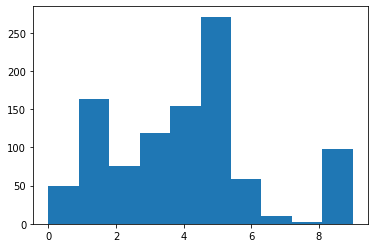

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    for i in range (10):
       if ((rng.current>m*weight[i])&(rng.current<=m*weight[i+1])):
           return i
weight=np.array([0,0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight=weight/sum(weight)
a=0
for i in range (1,11):
    a=a+weight[i]
    weight[i]=a;
rng.current = 1
random = [rng() for i in range(1000)]
plt.hist(random)
plt.show()

2.  Смоделируйте выборку размера 1000 из распределения Exp(λ). Постройте выборочную гистограмму и точный график плотности распределения.

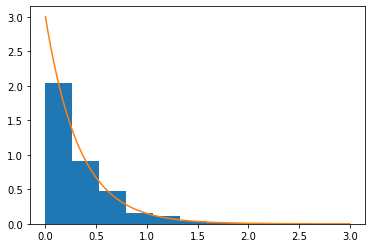

In [38]:
from scipy import stats
lamb=3
a=np.random.uniform(size=1000)
b=np.log(1-a)/(-lamb)
plt.hist(b,density=True)
c = np.arange(0, 3,0.0001)
plt.plot(c, scipy.stats.expon.pdf(c, scale=1 / lamb))

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

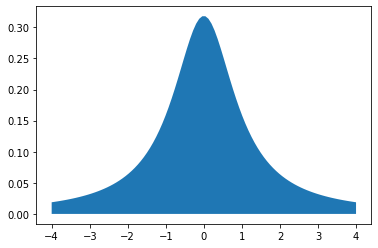

In [39]:
from scipy import stats
import numpy as np
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!
plt.show()

Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

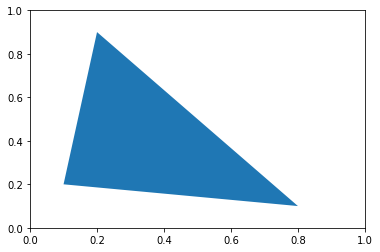

In [40]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

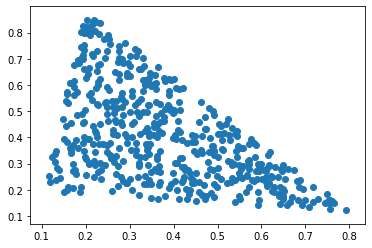

In [54]:
x=np.random.uniform(size=500)
y=np.random.uniform(size=500)
for i in range(0,500):
    if ((x[i]+y[i])>=1):
        x[i]=1-x[i]
        y[i]=1-y[i]
x=0.7*x+0.1*y+0.1
y=-0.1*x+0.7*y+0.2
plt.scatter(x,y)

Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

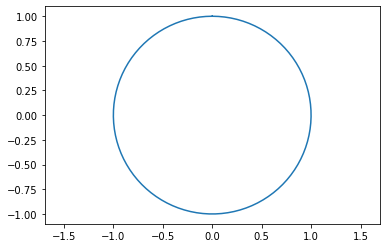

In [55]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

(-1.108318811463743,
 1.1004103607959197,
 -1.0658439931267256,
 1.1082070877687102)

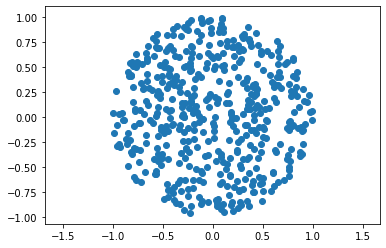

In [64]:
arg=np.random.uniform(size=500,low=0,high=np.pi*2)
rad=np.random.uniform(size=500)
rad=np.sqrt(rad)
x=rad*np.cos(arg)
y=rad*np.sin(arg)
plt.scatter(x,y)
plt.axis('equal')

Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

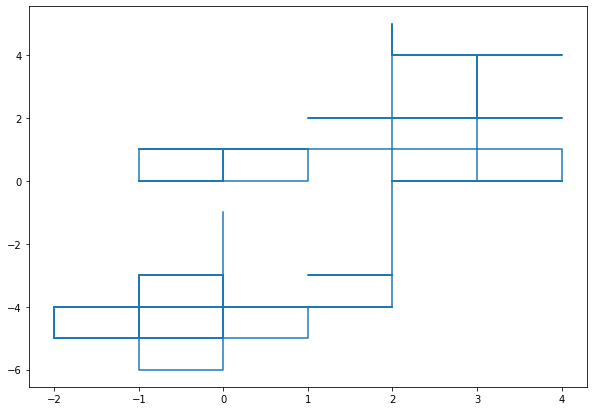

In [5]:
import numpy as np
import matplotlib.pyplot as plt
Xsteps=np.ones(100)
Ysteps=np.ones(100)
#на каждом шаге мы идем либо вверх либо вниз, поэтому количество +1 и -1 должно быть одним и тем же
DownStepsX=np.random.choice(np.arange(100),50,replace=False)
DownStepsY=np.random.choice(np.arange(100),50,replace=False)
Xsteps[DownStepsX]=-1
Ysteps[DownStepsY]=-1
Xstates=np.cumsum(Xsteps)
Ystates=np.cumsum(Ysteps)
X=(Xstates+Ystates)/2
Y=-(Xstates-Ystates)/2
plt.figure(figsize=(10,7))
plt.plot(X,Y)

Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

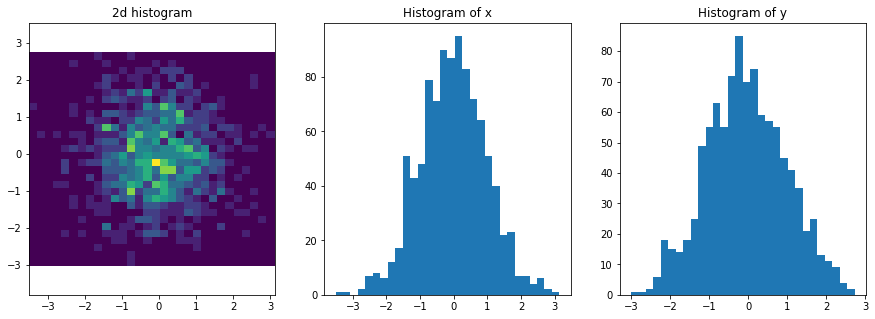

In [6]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Надо сделать выборку из $N(0,1)$ и сделать замену координат, чтобы единичная матрица перешла в матрицу {{2,1},{1,4}}, как известно преобразование матрицы $A^T\cdot C\cdot A$, но в нашем случае $C$ единичная. Wolfram решает систему и получает, что нужная матрица -{{sqrt(2),1/sqrt(2)},{0,-sqrt(7/2)}}

3.0723609137030676 6.071993782143601
[[2.41226851 1.322534  ]
 [1.322534   3.5963823 ]]


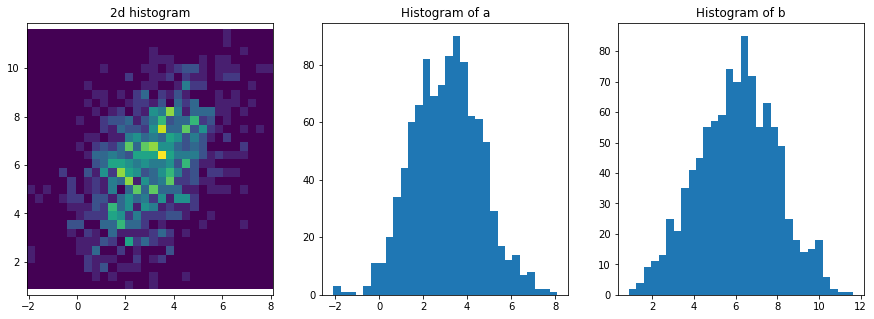

In [11]:
a = (-np.sqrt(2)) * x - (1/np.sqrt(2)) * y + 3
b = (-np.sqrt(7/2)) * y + 6
print(np.mean(a),np.mean(b))

print(np.cov([a,b]))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(a, b, bins=30)
ax[0].axis('equal')
ax[1].hist(a, bins=30)
ax[2].hist(b, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of a")
ax[2].set_title("Histogram of b")
plt.show()

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [14]:
import math
n=100
a=np.zeros(n)
b=1
for i in range(n):
    b=b*(i+1)
    a[i]=((i+1)**n)/b
#a=a/math.exp(1)
a = a/a.sum()
NumberOfSets=np.zeros(1000)
for i in range(1000):
    NumberOfSets[i]=np.random.choice(np.arange(1,n+1),p=a)
np.mean(NumberOfSets)



29.672

среднее количество подмножеств --- 29.672